<a href="https://colab.research.google.com/github/theradtad/DL-fastai/blob/main/FastAI_DL_Chp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install -Uqq fastai2

In [9]:
#!/bin/bash
!curl -L -o ~/Downloads/fruit-images-for-object-detection.zip\
  https://www.kaggle.com/api/v1/datasets/download/mbkinaci/fruit-images-for-object-detection

!unzip ~/Downloads/fruit-images-for-object-detection.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 28.3M  100 28.3M    0     0  12.5M      0  0:00:02  0:00:02 --:--:-- 19.1M
Archive:  /root/Downloads/fruit-images-for-object-detection.zip
  inflating: test_zip/test/apple_77.jpg  
  inflating: test_zip/test/apple_77.xml  
  inflating: test_zip/test/apple_78.jpg  
  inflating: test_zip/test/apple_78.xml  
  inflating: test_zip/test/apple_79.jpg  
  inflating: test_zip/test/apple_79.xml  
  inflating: test_zip/test/apple_80.jpg  
  inflating: test_zip/test/apple_80.xml  
  inflating: test_zip/test/apple_81.jpg  
  inflating: test_zip/test/apple_81.xml  
  inflating: test_zip/test/apple_82.jpg  
  inflating: test_zip/test/apple_82.xml  
  inflating: test_zip/test/apple_83.jpg  
  inflating: test_zip/test/apple_83.xml  
  inflating: test_zip/test/apple

In [10]:
!mkdir -p apple/
!mkdir -p banana/
!mkdir -p orange/

!cp train_zip/train/apple*.jpg apple/
!cp train_zip/train/banana*.jpg banana/
!cp train_zip/train/orange*.jpg orange/

!cp test_zip/test/apple*.jpg apple/
!cp test_zip/test/banana*.jpg banana/
!cp test_zip/test/orange*.jpg orange/

In [11]:
from fastai.vision.all import *

db = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [12]:
!mkdir -p dataset/

In [13]:
!mv apple banana orange dataset/
!ls dataset/

apple  banana  orange


In [15]:
dls = db.dataloaders("dataset/")
dls.vocab

['apple', 'banana', 'orange']

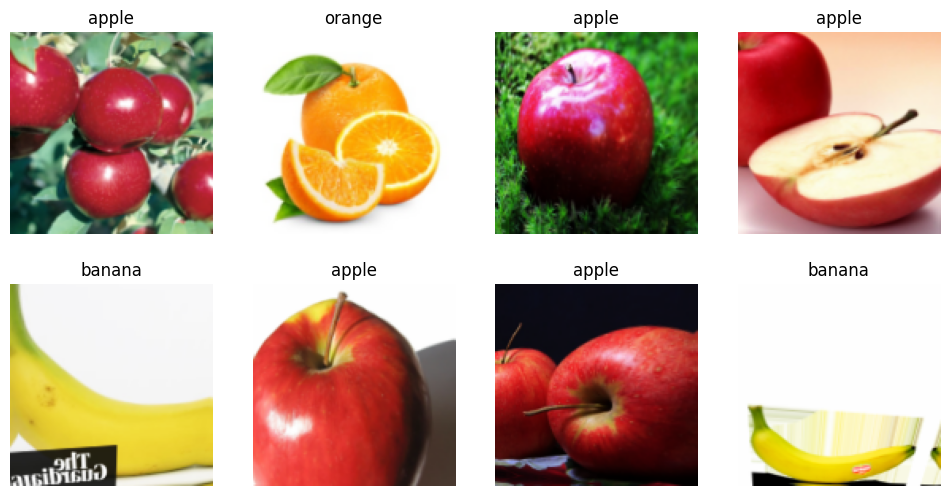

In [16]:
db = db.new(
    item_tfms=RandomResizedCrop(128, min_scale=0.35),
    batch_tfms=aug_transforms()
    )
dls = db.dataloaders("dataset/")
dls.show_batch(max_n=8)

In [17]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 74.8MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.994910,0.666960,0.290909,00:22


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.897962,0.174103,0.036364,00:27
1,0.645529,0.123747,0.036364,00:27
2,0.501072,0.108737,0.036364,00:29


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in by

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


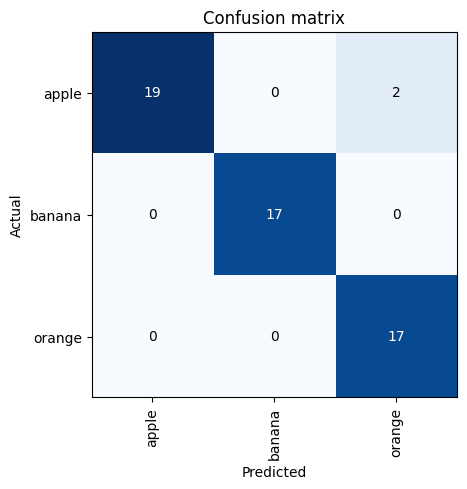

In [18]:
interpretation = ClassificationInterpretation.from_learner(learn)
interpretation.plot_confusion_matrix()

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


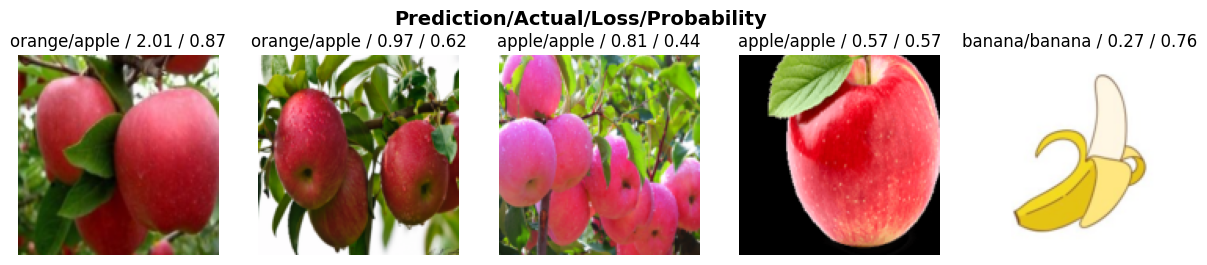

In [20]:
interpretation.plot_top_losses(5, nrows=1)

In [21]:
learn.export("model.pkl")

path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('model.pkl')]

In [22]:
learn_inf = load_learner(path/'model.pkl')

/usr/local/lib/python3.12/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [23]:
learn_inf.predict('Orange-Fruit-Pieces.jpg')

('orange', tensor(2), tensor([5.0096e-08, 2.7305e-08, 1.0000e+00]))

In [24]:
learn_inf.dls.vocab

['apple', 'banana', 'orange']